In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
pwd

'C:\\Users\\joshu\\OneDrive\\Desktop\\progress'

In [3]:
#Loading dataset
df = pd.read_csv('C:/Users/joshu/OneDrive/Desktop/progress/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,43,male,32.600,2,no,other,74415.0100
1,52,female,37.525,2,no,kisumu,334719.7189
2,18,female,39.160,0,no,nairobi,16330.4440
3,51,male,31.635,0,no,kisumu,91741.3565
4,56,female,25.300,0,no,other,110705.3500


In [4]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [5]:
print('rows:', df.shape[0]," ",'columns:', df.shape[1]) 

rows: 1000   columns: 7


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,39.608000,14.157428,18.000,27.000000,40.000,52.000000,64.0000
bmi,1000.0,30.875325,6.051370,15.960,26.600000,30.590,35.162500,50.3800
children,1000.0,1.083000,1.199813,0.000,0.000000,1.000,2.000000,5.0000
charges,1000.0,130730.571935,119879.879412,11218.739,47115.922875,92830.213,158827.954375,637704.2801


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
sex,1000,2,male,505
smoker,1000,2,no,804
region,1000,4,nairobi,279


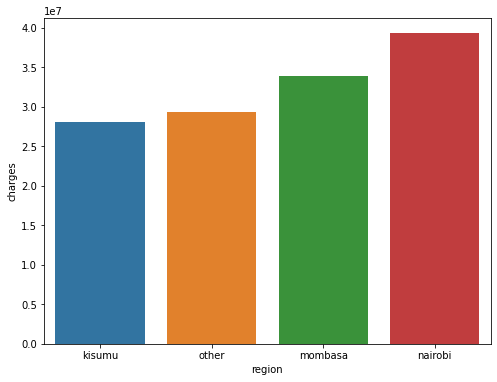

In [8]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize = (8,6))
ax = sns.barplot(x = charges.head().index, y = charges.head())

<AxesSubplot:xlabel='charges', ylabel='Density'>

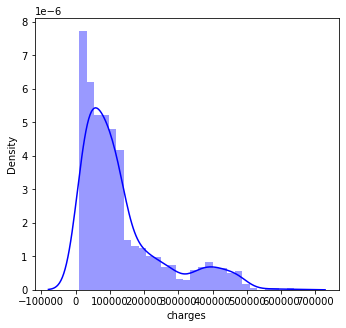

In [9]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df.charges, color = 'b')

Text(0.5, 1.0, 'Distribution of BMI')

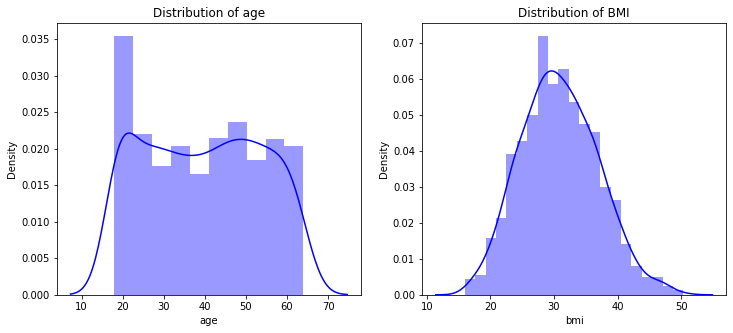

In [10]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(122)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

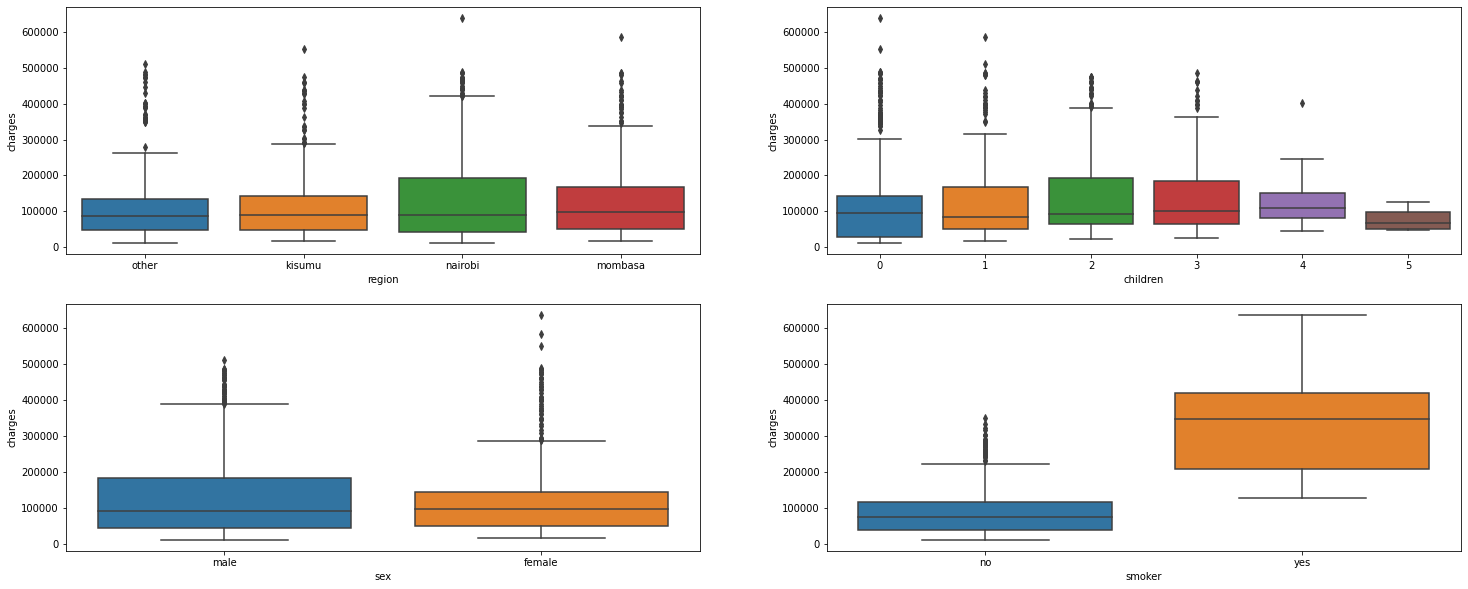

In [11]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

Text(0.5, 1.0, 'Number of children vs Medical Charges')

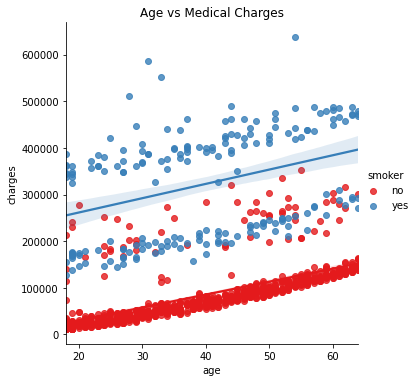

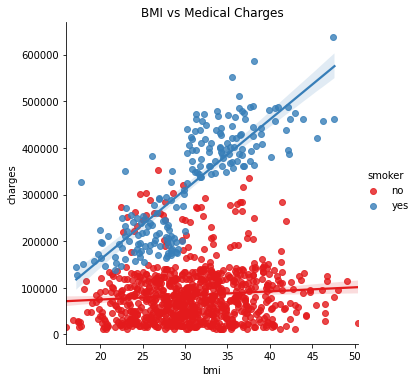

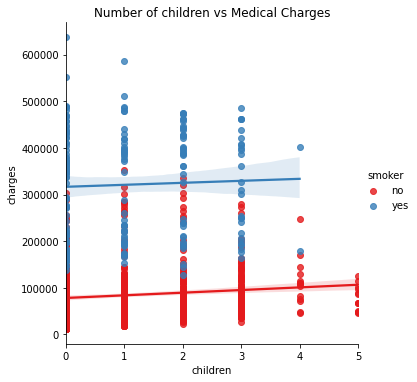

In [12]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

In [13]:
s2 = setup(df, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1000, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(699, 57)"


In [14]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,23308.1723,1948849248.9953,43887.6561,0.8543,0.3828,0.2544,0.0590
ridge,Ridge Regression,27128.3367,2053021376.0000,45077.6977,0.8474,0.3905,0.2690,0.0570
br,Bayesian Ridge,27214.1280,2053291891.3642,45073.2835,0.8474,0.3894,0.2702,0.0060
lasso,Lasso Regression,27218.8037,2072567603.2000,45316.7051,0.8458,0.3975,0.2706,0.0900
lr,Linear Regression,27234.7113,2074005312.0000,45332.9980,0.8457,0.3980,0.2709,0.4740
omp,Orthogonal Matching Pursuit,26449.0488,2094855660.0722,45577.4935,0.8454,0.3657,0.2470,0.0050
rf,Random Forest Regressor,24031.1231,2083301793.9506,45302.7000,0.8434,0.4118,0.2624,0.1400
huber,Huber Regressor,17723.6376,2246208989.0793,47025.9996,0.8345,0.3376,0.0693,0.0210
llar,Lasso Least Angle Regression,29104.5616,2248501754.3631,47209.2450,0.8344,0.4380,0.3143,0.0060
catboost,CatBoost Regressor,25799.8815,2249723711.6100,47143.7665,0.8320,0.4288,0.3014,3.1310


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19154.0799,1571018656.6589,39636.0777,0.8771,0.3428,0.2012
1,19755.5627,1413704521.6129,37599.2622,0.9192,0.2907,0.1989
2,23296.7782,2173019104.6465,46615.6530,0.7217,0.4385,0.2074
3,24189.8758,2003089545.3821,44755.8884,0.8594,0.3825,0.2648
4,23480.2726,1588850807.4693,39860.3915,0.9165,0.3841,0.2812
5,24436.0279,2471839589.1121,49717.5984,0.8496,0.3957,0.2737
6,25067.2347,2173579817.3193,46621.6668,0.8424,0.3860,0.2312
7,26923.3677,2252844838.0640,47464.1427,0.8087,0.4106,0.3329
8,21134.2600,1338475992.6407,36585.1882,0.8950,0.3987,0.2863
9,25644.2637,2502069617.0471,50020.6919,0.8536,0.3979,0.2665


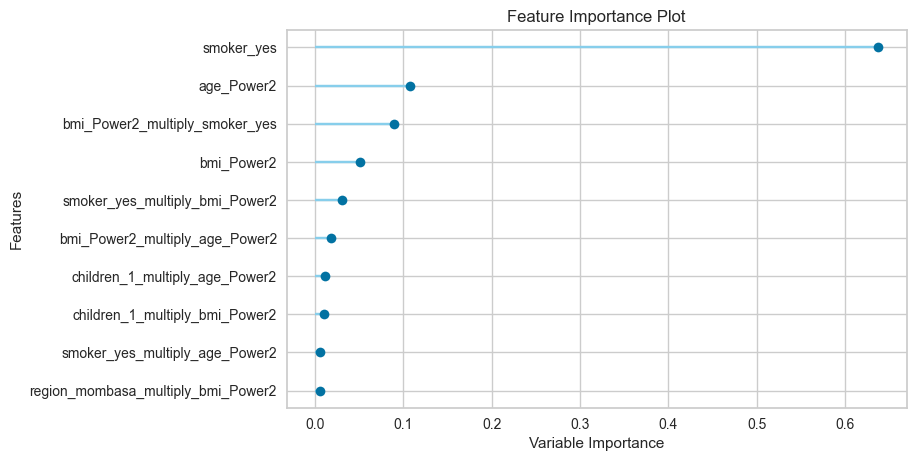

In [22]:
plot_model(gbr, plot='feature')

In [17]:
bagged_gbr = ensemble_model(gbr, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18774.0873,1406445812.2988,37502.6107,0.8899,0.3479,0.2009
1,19191.6827,1341861236.3904,36631.4242,0.9233,0.3183,0.2286
2,24349.9383,2132540787.2426,46179.4412,0.7268,0.4355,0.2334
3,24035.5751,1896689460.6073,43550.9984,0.8669,0.3953,0.2767
4,24377.6459,1585547433.7167,39818.9331,0.9167,0.4036,0.3065
5,24509.3558,2429287795.3997,49287.8057,0.8522,0.4117,0.3027
6,25083.7898,2150422535.4691,46372.6486,0.8440,0.4016,0.2336
7,26675.4331,2053578537.3474,45316.4268,0.8257,0.4115,0.3274
8,21296.2135,1263212117.7342,35541.6955,0.9009,0.4197,0.3010
9,25143.3775,2463325215.1727,49631.8972,0.8559,0.4073,0.2671


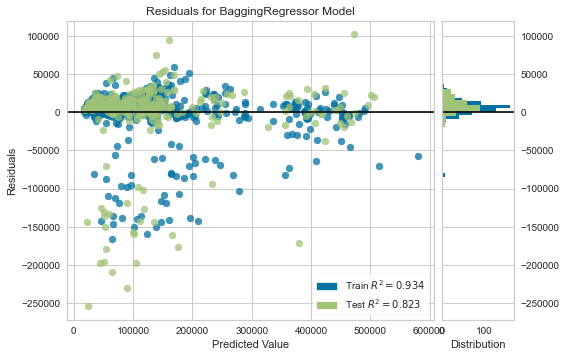

In [20]:
plot_model(bagged_gbr)

In [23]:
save_model(bagged_gbr, 'C:/Users/joshu/OneDrive/Desktop/progress/deployment_110620201')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                            min_weight_fraction_leaf=0.0,
                                                                            n_estimators=100,
                                                                            n_iter_no_change=None,
              

In [24]:
deployment_110620201 = load_model('C:/Users/joshu/OneDrive/Desktop/progress/deployment_110620201')

Transformation Pipeline and Model Successfully Loaded


In [25]:
deployment_110620201

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                                                           min_weight_fraction_leaf=0.0,
                                                                           n_estimators=100,
                                                                           n_iter_no_change=None,
                             